# Decision tree classifier

In [1]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Node:
    '''
    the class representing a single node in a decision tree
    '''
    def __init__(self, depth, X=None, y=None):
        '''
        isleaf : a Boolean variable indicating whether the node is a leaf node or not.
        depth : the depth of the node
        X : the indices of data set associated with the nodes (to be splitted by the node)
        y : label associated with the data
        feature : the index of axis by which the node separate data
        thresh : the threshold $\theta$ of splitting applied to the feature.
        label : the most frequent class in the points associated with the node.
        left : the left child node of the node
        right : the right child node of the node
        '''
        self.isleaf = None
        self.depth = depth
        self.X = X
        self.y = y
        self.n, self.m = np.shape(self.X)
        self.feature = None
        self.thresh = None
        self.label = np.argmax(np.bincount(y))
        self.left = None
        self.right = None
        
        
    def impurity(self, y, criterion):
        '''
        The method calculates the impurity criterion (entropy or gini) for a given label array y.
        '''
        classes = np.bincount(y)
        if criterion == 'entropy':
            entropy = 0
            for c in classes:
                if c != 0:
                    p = c / len(y)
                    entropy -= p * np.ln(p)
            return entropy
                
        elif criterion == 'gini':
            gini = 0
            for c in classes:
                if c != 0:
                    p = c / len(y)
                    gini += p * (1-p)
            return gini
        else:
            raise ValueError('Criterion should be either "entropy" or "gini"')
 
            
    def calc_impurity_splitted(self, y_left, y_right, criterion):
        '''
        The method calculates the impurity criterion after the splitting, where the values is given by weighted sum of impurity indices of two regions.
        '''
        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right
        impurity_left = self.impurity(y_left, criterion)
        impurity_right = self.impurity(y_right, criterion)
        return n_left / n_total * impurity_left + n_right / n_total * impurity_right
    
        
    
    def find_best_split(self, criterion):
        
        best_feature = None
        best_thresh = None
        
        ##################
        # your code here #
        ##################
        
        self.feature = best_feature
        self.thresh = best_thresh
    
    def split(self, max_depth, min_samples_split, criterion):
        '''
        The method splits data points recursively, where the splitting is based on the feature and threshold given by the result of find_best_split
        '''
        
        ##################
        # your code here #
        ##################
        
            
    def judge(self, x):
        '''
        This recursive method makes prediction as to which class the input x falls into. If the node is not a leaf (self.isleaf==False), then it will descend the tree to ask sub-nodes.
        '''
        if self.isleaf:
            return self.label
        else:
            if x[self.feature] < self.thresh:
                return self.left.judge(x)
            else:
                return self.right.judge(x)

In [3]:
class DecisionTreeClassifier:
    def __init__(self, max_depth, min_samples_split, criterion):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
    
    def fit(self, X, y):
        self.root_node = Node(depth=0, X=X, y=y)
        self.root_node.split(max_depth=self.max_depth, min_samples_split=self.min_samples_split, criterion=self.criterion)
        return self
        
    def predict(self, X):
        y = np.zeros(len(X), dtype='int')
        for i in range(len(X)):
            y[i] = self.root_node.judge(X[i])
        return y

# Experiment

In [4]:
from sklearn import datasets

N = 100
X, y = datasets.make_moons(n_samples = N, noise = 0.2)

xx1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),101)
xx2 = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
Xtest = np.array([[x1,x2] for x1 in xx1  for x2 in xx2])
xxx1, xxx2 = np.meshgrid(xx1, xx2)

def plot_result(clf):
    plt.plot(X[:,0][y==1], X[:,1][y==1],"o",label="1")
    plt.plot(X[:,0][y==0], X[:,1][y==0],"o",label="0")
    plt.legend()
    pred_val = clf.predict(Xtest)
    pred_val_2D = np.reshape(pred_val,(len(xx1),len(xx2))).T
    plt.pcolormesh(xxx1, xxx2, pred_val_2D, shading='auto')
    plt.colorbar()
    plt.show()

TypeError: '<' not supported between instances of 'float' and 'NoneType'

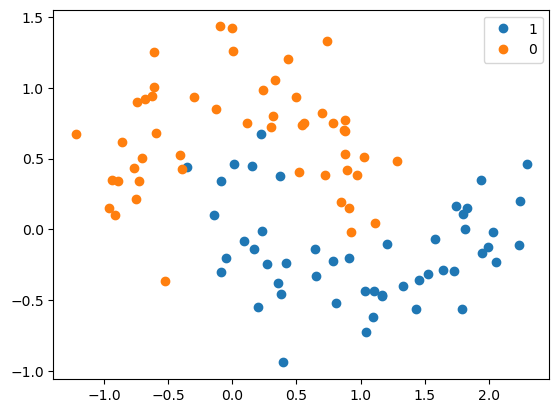

In [5]:
dtc = DecisionTreeClassifier(max_depth=40, min_samples_split=2, criterion='entropy')
dtc.fit(X, y)
plot_result(dtc)